In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize

In [62]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

x_data_years = np.arange(1994,2023)

In [63]:
# Customize the default plotting style
plt.rcParams['figure.figsize'] = (8, 6)  # Set the default figure size
plt.rcParams['axes.labelsize'] = 14      # Set the default label font size
plt.rcParams['axes.titlesize'] = 16      # Set the default title font size
plt.rcParams['xtick.labelsize'] = 12     # Set the default x-axis tick font size
plt.rcParams['ytick.labelsize'] = 12     # Set the default y-axis tick font size
plt.rcParams['lines.linewidth'] = 2.0    # Set the default line width
plt.rcParams['lines.markersize'] = 8     # Set the default marker size
plt.rcParams['legend.fontsize'] = 12     # Set the default legend font size
plt.rcParams['axes.grid'] = True         # Enable grid lines by default

# Now, all subsequent plots in your script will use these settings


In [64]:
data_dir = 'C:/Users/leonh/Desktop/Praktikum_AWI/GVN/data/GVN_cont-meteo_1982-etseq/datasets/'
df_all = pd.DataFrame()
# Erstellen Sie eine leere Liste, um DataFrames zu speichern
#years = []



#Schleife für die Monate
for year in range(1983,2022):
    dataframes = []
    for month in range(1, 13):
        file = f'GVN_cont_meteorology_{year}-{month:02d}.tab'
        filename = data_dir + file

        comment_lines = 0
        with open(filename, 'r') as file:
            for line in file:
                if line.startswith('*/'):
                    break
                comment_lines += 1
        # Erzeugen des Dateinamens
        

        # Lesen der CSV-Datei für den aktuellen Monat
        df = pd.read_csv(filename,  skiprows=comment_lines+1,sep='\t')
        
        df['Date/Time'] = pd.to_datetime(df['Date/Time'])
        # print('Zahlen der NaN-Einträge: '+str(np.sum(np.isnan(df['T2 [°C] (average, Thermometer)']))))
        # df.loc[np.isnan(df['T2 [°C] (average, Thermometer)']),'T2 [°C] (average, Thermometer)'] = np.nanmean(df['T2 [°C] (average, Thermometer)'])
        df_all = pd.concat((df_all, df), ignore_index= True)
        # Fügen Sie den DataFrame zur Liste hinzu
        #dataframes.append(df)
    #years.append(dataframes.copy())







In [65]:
#df_backup = df_all.copy()


In [98]:
df_all = df_backup.copy()

In [99]:
df_all = df_all.drop(['SWU [W/m**2] (average, Pyranometer)', 'LWD [W/m**2] (average)'], axis= 1)


In [100]:
df_all = df_all.drop(['Height [m]','SWD [W/m**2] (average, Pyranometer)', 'LWU [W/m**2] (average)', 'LWD [W/m**2]', 'LWU [W/m**2]', 'SWD OG1 [W/m**2] (average, Pyranometer)',
       'SWD RG8 [W/m**2] (average, Pyranometer)',
       'LWD [W/m**2] (average, Pyrgeometer)',
       'LWU [W/m**2] (average, Pyrgeometer)',   'UV rad [W/m**2] (average, Total Ultraviolet Ra...)','SWD OG1 [W/m**2]', 'SWD RG8 [W/m**2]', 'UV rad [W/m**2]','SSD [min] (Instantaneous value at end of...)',
       'T10 [°C] (1-min average, Thermometer, T...)',
       'DD10 [deg] (1-min average, Anemometer, Th...)',
       'FF10 [m/s] (1-min average, Anemometer, Th...)','DD2 [deg] (1-min average, Anemometer, Th...)',
       'DIF [W/m**2] (average, Pyranometer)','DD10 [deg]'], axis= 1)


In [101]:
print(df_all.columns)
df_all = df_all.drop(['DD2 [deg]',  'SWD OG1 [W/m**2] (1-min average, Pyranometer, E...)',
       'SWD RG8 [W/m**2] (1-min average, Pyranometer, E...)', 'LWD [W/m**2] (1-min average, Pyrgeometer, K...)', 'LWD [W/m**2] (1-min average; Sensor changed...)',
       'DD10 [deg] (average, Anemometer)', 'FF10 [m/s] (average, Anemometer)',
        'SWD [W/m**2]', 'SWU [W/m**2]','CBH [m] (minimum 30000: no clouds dete...)','UV rad [W/m**2] (1-min average, Total Ultravio...)','T10 [°C] (average, Thermometer)','T10 [°C]'], axis= 1)

len(df_all.columns)

Index(['Date/Time', 'SSD [min] (average)', 'T10 [°C] (average, Thermometer)',
       'DD10 [deg] (average, Anemometer)', 'FF10 [m/s] (average, Anemometer)',
       'T2 [°C] (average, Thermometer)', 'DD2 [deg] (average, Anemometer)',
       'FF2 [m/s] (average, Anemometer)',
       'RH [%] (average, redundant measuremen...)',
       'RH [%] (average, redundant measuremen...).1',
       'PoPoPoPo [hPa] (average, Barometer)', 'SWD [W/m**2]', 'SWU [W/m**2]',
       'SSD [min]', 'T10 [°C]', 'FF10 [m/s]', 'T2 [°C]', 'DD2 [deg]',
       'FF2 [m/s]', 'RH [%]', 'PoPoPoPo [hPa]',
       'CBH [m] (minimum 30000: no clouds dete...)',
       'T2 [°C] (1-min average, Thermometer, T...)',
       'FF2 [m/s] (1-min average, Anemometer, Th...)',
       'RH [%] (1-min average, redundant meas...)',
       'RH [%] (1-min average, redundant meas...).1',
       'PoPoPoPo [hPa] (1-min average, Barometer, Par...)',
       'SWD OG1 [W/m**2] (1-min average, Pyranometer, E...)',
       'SWD RG8 [W/m**2] (1-min av

28

In [102]:
# 
columns_to_average = [
    'PoPoPoPo [hPa]',
    'PoPoPoPo [hPa] (average, Barometer)',
    'PoPoPoPo [hPa] (Barometer, Paroscientific, Di...)',
    'PoPoPoPo [hPa] (1-min average; Sensor changed...)',
    'PoPoPoPo [hPa] (1-min average, redundant meas...)',
    'PoPoPoPo [hPa] (1-min average, redundant meas...).1',
    'PoPoPoPo [hPa] (1-min average, Barometer, Par...)'
]

# Calculate the row-wise mean for the selected columns
df_all['PoPoPoPo'] = np.nanmean(df_all[columns_to_average], axis=1)

df_all = df_all.drop(['PoPoPoPo [hPa]', 'PoPoPoPo [hPa] (average, Barometer)','PoPoPoPo [hPa] (Barometer, Paroscientific, Di...)', 'PoPoPoPo [hPa] (1-min average; Sensor changed...)',
                                  'PoPoPoPo [hPa] (1-min average, redundant meas...)', 'PoPoPoPo [hPa] (1-min average, redundant meas...).1', 'PoPoPoPo [hPa] (1-min average, Barometer, Par...)'], axis = 1)

C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\676634122.py:13: RuntimeWarning: Mean of empty slice
  df_all['PoPoPoPo'] = np.nanmean(df_all[columns_to_average], axis=1)


In [103]:

columns_to_average = [
    'FF2 [m/s] (1-min average, Anemometer, Th...)',
    'FF2 [m/s] (average, Anemometer)',
    'FF2 [m/s]'
]

# Calculate the row-wise mean for the selected columns
df_all['FF2 [m/s]'] = np.nanmean(df_all[columns_to_average], axis=1)

df_all = df_all.drop([
    'FF2 [m/s] (1-min average, Anemometer, Th...)',
    'FF2 [m/s] (average, Anemometer)'], axis = 1)

C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\3990063649.py:8: RuntimeWarning: Mean of empty slice
  df_all['FF2 [m/s]'] = np.nanmean(df_all[columns_to_average], axis=1)


In [104]:
df_all['RH [%]'] = np.nanmean(df_all[['RH [%]','RH [%] (average, redundant measuremen...)','RH [%] (average, redundant measuremen...).1','RH [%] (1-min average, redundant meas...)', 'RH [%] (1-min average, redundant meas...).1','RH [%] (nominal mounting height: 2m, ...)', 'RH [%] (nominal mounting height: 2m, ...).1','RH [%] (nominal mounting height: 10m,...)','RH [%] (nominal mounting height: 10m,...).1']], axis = 1)

df_all = df_all.drop(['RH [%] (average, redundant measuremen...)','RH [%] (average, redundant measuremen...).1','RH [%] (1-min average, redundant meas...)', 'RH [%] (1-min average, redundant meas...).1','RH [%] (nominal mounting height: 2m, ...)', 'RH [%] (nominal mounting height: 2m, ...).1','RH [%] (nominal mounting height: 10m,...)','RH [%] (nominal mounting height: 10m,...).1'], axis = 1)

C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\1977529125.py:1: RuntimeWarning: Mean of empty slice
  df_all['RH [%]'] = np.nanmean(df_all[['RH [%]','RH [%] (average, redundant measuremen...)','RH [%] (average, redundant measuremen...).1','RH [%] (1-min average, redundant meas...)', 'RH [%] (1-min average, redundant meas...).1','RH [%] (nominal mounting height: 2m, ...)', 'RH [%] (nominal mounting height: 2m, ...).1','RH [%] (nominal mounting height: 10m,...)','RH [%] (nominal mounting height: 10m,...).1']], axis = 1)


In [105]:
# df_all.columns
# df_all['T2'] = np.nanmean(df_all.loc[['T2 [°C] (average, Thermometer)', 'DD2 [deg] (average, Anemometer)','T2 [°C] (1-min average, Thermometer, T...)','T2 [°C] (1-min average; Sensor changed...)']], axis = 1)


# Specify the list of column names to average
columns_to_average = [
    'T2 [°C] (average, Thermometer)',
    'T2 [°C]',
    'T2 [°C] (1-min average, Thermometer, T...)',
    'T2 [°C] (1-min average; Sensor changed...)'
]

# Calculate the row-wise mean for the selected columns
df_all['T2'] = np.nanmean(df_all[columns_to_average], axis=1)


df_all = df_all.drop(['T2 [°C] (average, Thermometer)', 'DD2 [deg] (average, Anemometer)','T2 [°C]','T2 [°C] (1-min average, Thermometer, T...)','T2 [°C] (1-min average; Sensor changed...)'], axis = 1)

C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\3424619239.py:14: RuntimeWarning: Mean of empty slice
  df_all['T2'] = np.nanmean(df_all[columns_to_average], axis=1)


In [106]:
df_all = df_all.drop(['SSD [min]','FF10 [m/s]','SSD [min] (average)'], axis = 'columns')

In [107]:
df_all.to_csv('df_all_GVN.csv')
#df_all = pd.read_csv('df_all_GVN.csv')
#df_all['Date/Time'] = pd.to_datetime(df_all['Date/Time'])

In [108]:
# import datetime 
# # Create an empty DataFrame for monthly aggregation
# df_days = pd.DataFrame(columns= ['Date', 'T2Avg', 'T2Min', 'T2Max', 'RH', 'Pres'])

# for year in range(1983, 2022):
#     for month in range(1, 13):
#         for day in range(1,29):
#             start_date = pd.to_datetime(f'{year}-{month:02d}')
#             # if month < 12:
#             #     end_date = pd.to_datetime(f'{year}-{month+1:02d}')
#             # else:
#             #     end_date = pd.to_datetime(f'{year+1}-01')

#             # Filter the data for the current month
#             filtered_data_day = df_all[(df_all['Date/Time'] >=  start_date+ datetime.timedelta(days=day-1)) & (df_all['Date/Time'] < start_date+ datetime.timedelta(days=day))]


#             day_min = np.min(filtered_data_day['T2'])
#             day_max = np.max(filtered_data_day['T2'])
 

           
#             # Calculate the mean for each column in the filtered data
#             temp_T2 = np.nanmean(filtered_data_day['T2'])
#             temp_RH = np.nanmean(filtered_data_day['RH'])
#             temp_Pres = np.nanmean(filtered_data_day['PoPoPoPo'])

#             temp_df = pd.DataFrame({'Date':[start_date+ datetime.timedelta(days=day-1)], 'T2Avg': [temp_T2], 'T2Min': [day_min], 'T2Max': [day_max], 'RH':[temp_RH], 'Pres': [temp_Pres]})
#             df_days = pd.concat([df_days, temp_df], ignore_index= True)




In [109]:
df_all.columns

Index(['Date/Time', 'FF2 [m/s]', 'RH [%]', 'PoPoPoPo', 'T2'], dtype='object')

In [124]:
import datetime

# Group by date and calculate means for each column
df_all['Date'] = pd.to_datetime(df_all['Date/Time']).dt.date
agg_functions = {
    'T2': ['mean', 'min', 'max'],
    'RH [%]': 'mean',
    'PoPoPoPo': 'mean',
#    'SSD [min] (average)': 'mean',
    'FF2 [m/s]': 'mean'
}
df_days = df_all.groupby('Date').agg(agg_functions).reset_index()

# # Calculate DTR
# df_days['DTR'] = df_days['T2']['max'] - df_days['T2']['min']

# Rename columns for readability
df_days.columns = ['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]', 'Pres [hPa]',  'FF2 [m/s]']

# Convert Date column to datetime type
df_days['Date'] = pd.to_datetime(df_days['Date'])

# Filter the date range if needed (optional)
# df_days = df_days[(df_days['Date'] >= '1983-01-01') & (df_days['Date'] <= '2021-12-31')]

df_days['DTR [°C]'] = df_days['T2Max [°C]'] - df_days['T2Min [°C]']

In [125]:
df_days.columns

Index(['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]',
       'Pres [hPa]', 'FF2 [m/s]', 'DTR [°C]'],
      dtype='object')

In [126]:
df_days['Date'] = pd.to_datetime(df_days['Date'])

# Set the 'Date' column as the index
df_days.set_index('Date', inplace=True)

# Resample the data to monthly intervals and calculate means for each column
df_monthly = df_days.resample('M').mean().reset_index()

# Rename columns for readability (if needed)
df_monthly.columns = ['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]', 'Pres [hPa]',  'FF2 [m/s]', 'DTR [°C]']

# Reset the 'Date' column to the original format (optional)
df_monthly['Date'] = df_monthly['Date'].dt.strftime('%Y-%m-%d')

# Print or save the new dataframe df_monthly
print(df_monthly)

           Date  T2Avg [°C]  T2Min [°C]  T2Max [°C]     RH [%]  Pres [hPa]  \
0    1983-01-31   -5.334791   -9.012903   -2.351613  84.829413  990.142509   
1    1983-02-28   -6.165506   -8.580000   -4.112000  84.746468  984.494668   
2    1983-03-31  -12.204450  -15.651613   -9.374194  86.783831  980.789596   
3    1983-04-30  -16.759073  -20.663333  -13.183333  84.873872  975.866732   
4    1983-05-31  -17.452731  -20.961290  -14.216129  85.281154  988.025736   
..          ...         ...         ...         ...        ...         ...   
463  2021-08-31  -28.428725  -32.990323  -24.006452  72.133761  976.111837   
464  2021-09-30  -21.291936  -25.633333  -17.440000  75.573258  972.279863   
465  2021-10-31  -17.903341  -22.951613  -14.200000  76.103630  979.092240   
466  2021-11-30   -9.546146  -13.780000   -6.653333  82.358647  975.708272   
467  2021-12-31   -5.591342  -10.070968   -2.393548  85.524667  973.149735   

     FF2 [m/s]  DTR [°C]  
0     3.268714  6.661290  
1     6.6

In [ ]:
# import pandas as pd
# import numpy as np
# import datetime

# # Create an empty DataFrame for daily aggregation
# df_days = pd.DataFrame(columns=['Date', 'T2Avg', 'T2Min', 'T2Max', 'RH', 'Pres'])

# # Extract year and month from the Date/Time column
# df_all['Year'] = df_all['Date/Time'].dt.year
# df_all['Month'] = df_all['Date/Time'].dt.month
# df_all['Day'] = df_all['Date/Time'].dt.day

# # Loop through the years, months, and days
# for year in range(1983, 2022):
#     for month in range(1, 13):
#         for day in range(1, 29):
#             # Filter the data for the current year, month, and day
#             filtered_data_day = df_all[(df_all['Year'] == year) & (df_all['Month'] == month) & (df_all['Day'] == day)]
            
#             if not filtered_data_day.empty:
#                 # Calculate the mean for each column in the filtered data
#                 temp_T2_avg = filtered_data_day['T2'].mean()
#                 temp_T2_min = filtered_data_day['T2'].min()
#                 temp_T2_max = filtered_data_day['T2'].max()
#                 temp_RH = filtered_data_day['RH'].mean()
#                 temp_Pres = filtered_data_day['PoPoPoPo'].mean()
                
#                 # Calculate the date for the current day
#                 date = datetime.date(year, month, day)
                
#                 # Append the aggregated values to df_days
#                 df_days = df_days.append({'Date': date, 'T2Avg': temp_T2_avg, 'T2Min': temp_T2_min, 'T2Max': temp_T2_max, 'RH': temp_RH, 'Pres': temp_Pres}, ignore_index=True)
#     print(str(year))

# # Convert Date column to datetime type (if needed)
# df_days['Date'] = pd.to_datetime(df_days['Date'])

# df_days['DTR'] = np.subtract(df_days['T2Max'], df_days['T2Min'])

## Daily scatter plots

In [116]:
# import seaborn as sns

# # Assuming you have already loaded and prepared the df_days DataFrame as shown in the previous response

# # Scatterplot matrix
# sns.set(style="ticks")
# sns.pairplot(df_days[['T2Avg [°C]', 'DTR [°C]', 'RH [%]', 'Pres [hPa]', 'FF2 [m/s]']], diag_kind='kde') # 'T2Min [°C]', 'T2Max [°C]',
# plt.show()

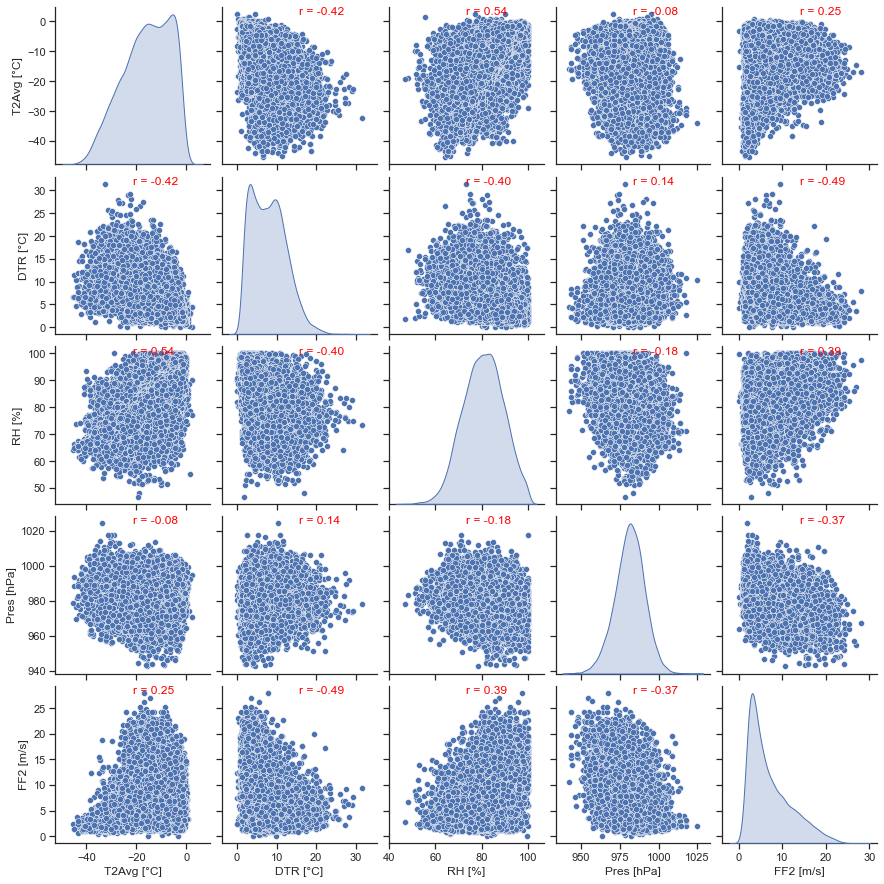

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# Assuming you have already loaded and prepared the df_days DataFrame as shown in the previous response

# Create a function to calculate and annotate correlations while ignoring NaN values
def calculate_and_annotate_correlation(x, y, **kwargs):
    valid_mask = ~np.logical_or(np.isnan(x), np.isnan(y))  # Create a mask for valid data points
    x_valid, y_valid = x[valid_mask], y[valid_mask]
    if len(x_valid) > 1:  # Check if there are enough valid data points for correlation
        corr_coef, _ = pearsonr(x_valid, y_valid)
        corr_text = f"r = {corr_coef:.2f}"
    else:
        corr_text = "r = NaN"
    ax = plt.gca()
    ax.annotate(corr_text, xy=(0.5, 0.95), xycoords=ax.transAxes, fontsize=12, color='red')

# Scatterplot matrix
sns.set(style="ticks")
g = sns.pairplot(df_days[['T2Avg [°C]', 'DTR [°C]', 'RH [%]', 'Pres [hPa]',  'FF2 [m/s]']], diag_kind='kde')

# Annotate correlations while ignoring NaN entries
g.map_offdiag(calculate_and_annotate_correlation)

plt.show()


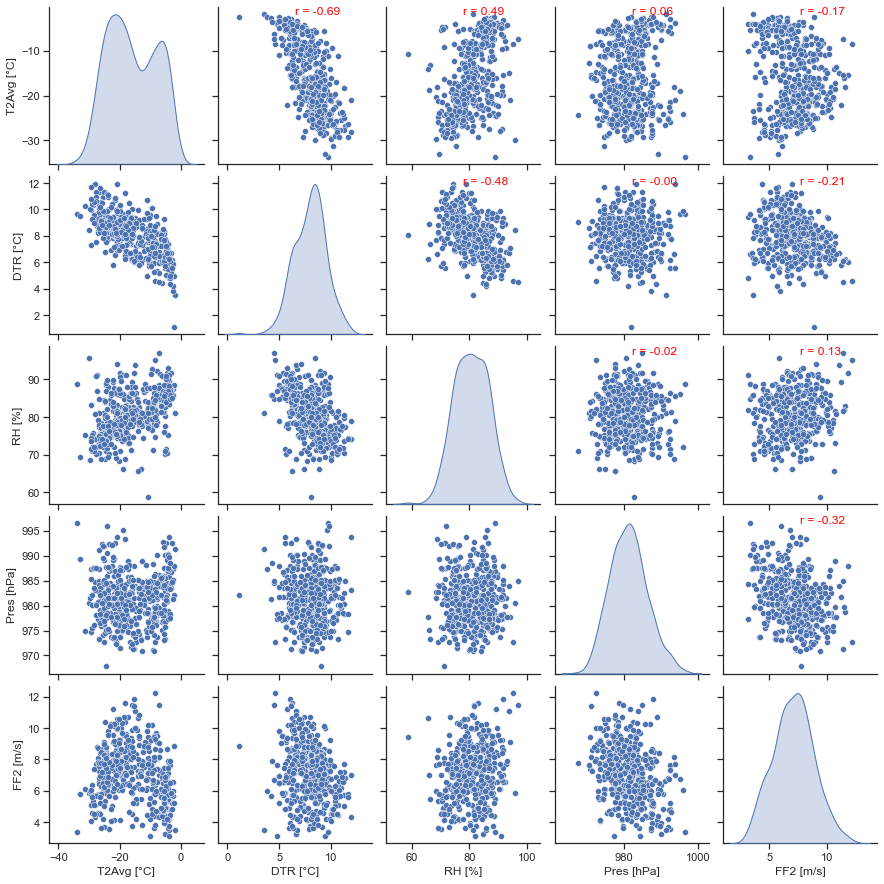

In [127]:
#df_days[# Create a function to calculate and annotate correlations while ignoring NaN values
def calculate_and_annotate_correlation(x, y, **kwargs):
    valid_mask = ~np.logical_or(np.isnan(x), np.isnan(y))  # Create a mask for valid data points
    x_valid, y_valid = x[valid_mask], y[valid_mask]
    if len(x_valid) > 1:  # Check if there are enough valid data points for correlation
        corr_coef, _ = pearsonr(x_valid, y_valid)
        corr_text = f"r = {corr_coef:.2f}"
    else:
        corr_text = "r = NaN"
    ax = plt.gca()
    ax.annotate(corr_text, xy=(0.5, 0.95), xycoords=ax.transAxes, fontsize=12, color='red')

# Scatterplot matrix
sns.set(style="ticks")
g = sns.pairplot(df_monthly[['T2Avg [°C]', 'DTR [°C]', 'RH [%]', 'Pres [hPa]',  'FF2 [m/s]']], diag_kind='kde')

# Annotate correlations while ignoring NaN entries
g.map_upper(calculate_and_annotate_correlation)

plt.show()

In [ ]:
df_days

,Date,T2Avg,T2Min,T2Max,RH,Pres,DTR
0,1983-01-01,-2.617213,-5.8,-1.0,89.217213,993.166066,4.8
1,1983-01-02,-2.702920,-3.7,-2.1,90.127737,996.182701,1.6
2,1983-01-03,-3.121739,-4.9,-2.0,84.334783,994.433913,2.9
3,1983-01-04,-4.756731,-9.1,-1.6,87.004808,993.219615,7.5
4,1983-01-05,-3.698000,-6.1,-1.9,84.775000,996.854500,4.2
...,...,...,...,...,...,...,...
13099,2021-12-24,-3.565833,-7.5,-1.8,86.818420,980.768684,5.7
13100,2021-12-25,-4.726042,-9.1,-3.1,88.505191,975.563479,6.0
13101,2021-12-26,-4.587083,-7.3,-2.5,79.083264,971.253215,4.8
13102,2021-12-27,-7.348056,-13.2,-2.1,80.190712,966.374538,11.1


In [ ]:
#df_days.to_csv('df_days_GVN.csv')
# df_days = pd.read_csv('df_days_GVN.csv')
# df_days['Date/Time'] = pd.to_datetime(df_days['Date/Time'])

In [ ]:
# import datetime 
# # Create an empty DataFrame for monthly aggregation
# df_month = pd.DataFrame(columns= ['Date', 'T2Avg', 'T2Min', 'T2Max', 'RH', 'Pres'])
# df_dates = pd.DataFrame(columns=['Date'])

# for year in range(1983, 2022):
#     for month in range(1, 13):
#         start_date = pd.to_datetime(f'{year}-{month:02d}')
#         if month < 12:
#             end_date = pd.to_datetime(f'{year}-{month+1:02d}')
#         else:
#             end_date = pd.to_datetime(f'{year+1}-01')
        
#         # Filter the data for the current month
#         filtered_data = df_all[(df_all['Date/Time'] >= start_date) & (df_all['Date/Time'] < end_date)]
        
#         day_min_month = []
#         day_max_month = []

#         for i in range (1, 29):
#             filtered_data_day = filtered_data[(filtered_data['Date/Time'] >=  start_date+ datetime.timedelta(days=i-1)) & (filtered_data['Date/Time'] < start_date+ datetime.timedelta(days=i))]
#             day_min = np.min(filtered_data_day['T2'])
#             day_max = np.max(filtered_data_day['T2'])
#             day_min_month.append(day_min)
#             day_max_month.append(day_max)


#         day_max_mean = np.nanmean(day_max_month)
#         day_min_mean = np.nanmean(day_min_month)
#         # Calculate the mean for each column in the filtered data
#         temp_T2 = np.nanmean(filtered_data['T2'])
#         temp_RH = np.nanmean(filtered_data['RH'])
#         temp_Pres = np.nanmean(filtered_data['PoPoPoPo'])
        
#         temp_df = pd.DataFrame({'Date':[start_date], 'T2Avg': [temp_T2], 'T2Min': [day_min_mean], 'T2Max': [day_max_mean], 'RH':[temp_RH], 'Pres': [temp_Pres]})
#         df_month = pd.concat([df_month, temp_df], ignore_index= True)
       

# df_month['DTR'] = np.subtract(df_month['T2Max'], df_month['T2Min'])

C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\663074697.py:28: RuntimeWarning: Mean of empty slice
  day_max_mean = np.nanmean(day_max_month)
C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\663074697.py:29: RuntimeWarning: Mean of empty slice
  day_min_mean = np.nanmean(day_min_month)
C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\663074697.py:31: RuntimeWarning: Mean of empty slice
  temp_T2 = np.nanmean(filtered_data['T2'])
C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\663074697.py:32: RuntimeWarning: Mean of empty slice
  temp_RH = np.nanmean(filtered_data['RH'])
C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\663074697.py:33: RuntimeWarning: Mean of empty slice
  temp_Pres = np.nanmean(filtered_data['PoPoPoPo'])


In [ ]:
import pandas as pd
import numpy as np
import datetime

# Assuming you have a DataFrame df_all with Date/Time, T2, RH, and PoPoPoPo columns

# Create an empty DataFrame for monthly aggregation
df_month = pd.DataFrame(columns=['Date', 'T2Avg', 'T2Min', 'T2Max', 'RH', 'Pres'])

# Extract year and month from the Date/Time column
df_all['Year'] = df_all['Date/Time'].dt.year
df_all['Month'] = df_all['Date/Time'].dt.month

# Loop through the years and months
for year in range(1983, 2022):
    for month in range(1, 13):
        # Filter the data for the current year and month
        filtered_data = df_all[(df_all['Year'] == year) & (df_all['Month'] == month)]
        
        if not filtered_data.empty:
            # Calculate the mean for each column in the filtered data
            temp_T2_avg = filtered_data['T2'].mean()
            temp_T2_min = filtered_data['T2'].min()
            temp_T2_max = filtered_data['T2'].max()
            temp_RH = filtered_data['RH'].mean()
            temp_Pres = filtered_data['PoPoPoPo'].mean()
            
            # Calculate the date for the current month
            date = datetime.date(year, month, 1)
            
            # Append the aggregated values to df_month
            df_month = df_month.append({'Date': date, 'T2Avg': temp_T2_avg, 'T2Min': temp_T2_min, 'T2Max': temp_T2_max, 'RH': temp_RH, 'Pres': temp_Pres}, ignore_index=True)

# Calculate the Daily Temperature Range (DTR)
df_month['DTR'] = df_month['T2Max'] - df_month['T2Min']

# Convert Date column to datetime type (if needed)
df_month['Date'] = pd.to_datetime(df_month['Date'])


C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\1701745834.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month = df_month.append({'Date': date, 'T2Avg': temp_T2_avg, 'T2Min': temp_T2_min, 'T2Max': temp_T2_max, 'RH': temp_RH, 'Pres': temp_Pres}, ignore_index=True)
C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\1701745834.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month = df_month.append({'Date': date, 'T2Avg': temp_T2_avg, 'T2Min': temp_T2_min, 'T2Max': temp_T2_max, 'RH': temp_RH, 'Pres': temp_Pres}, ignore_index=True)
C:\Users\leonh\AppData\Local\Temp\ipykernel_12464\1701745834.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month = df_month.append({'Date': date, 'T2Avg': temp_T2_avg, 'T2

### Creating monthly data

In [ ]:
df_month['month'] = df_month['Date'].dt.month

# Initialize an empty dictionary to store sub DataFrames by month
monthly_data = {}

# Loop through each unique month
for month in range(1, 13):
    # Filter the DataFrame to get data for the current month
    monthly_data[month] = df_month[df_month['month'] == month]

# Now, monthly_data is a dictionary where each key represents a month (1 to 12),
# and the corresponding value is a DataFrame containing data for that month.

In [ ]:
df_days['month'] = df_days['Date'].dt.month

# Initialize an empty dictionary to store sub DataFrames by month
monthly_data_days = {}

# Loop through each unique month
for month in range(1, 13):
    # Filter the DataFrame to get data for the current month
    monthly_data_days[month] = df_days[df_days['month'] == month]

# Now, monthly_data is a dictionary where each key represents a month (1 to 12),
# and the corresponding value is a DataFrame containing data for that month.

### Binning


In [ ]:
# Define the interval length 'd'
d = 2  # Adjust this value to your desired interval length

# Create bins for the 'x' values
df_days['bin'] = (df_days['T2Avg'] // d) * d

# Calculate the means of 'y' values in each bin
means_df = df_days.groupby('bin')['DTR'].mean().reset_index()

# Rename the columns for clarity
means_df.columns = ['TAvg_bin', 'DTR']

# Drop the 'bin' column if you don't need it
#means_df = means_df.drop(columns='bin')

# Print or use means_df as needed
print(means_df)

    TAvg_bin        DTR
0      -46.0   9.500000
1      -44.0   9.142857
2      -42.0   9.344444
3      -40.0   8.753659
4      -38.0   9.525175
5      -36.0  10.118182
6      -34.0  10.630592
7      -32.0  11.114211
8      -30.0  11.205161
9      -28.0  11.025725
10     -26.0  10.642685
11     -24.0  10.245070
12     -22.0   9.444357
13     -20.0   8.275656
14     -18.0   7.542486
15     -16.0   7.659333
16     -14.0   7.430879
17     -12.0   7.152497
18     -10.0   6.961905
19      -8.0   6.800326
20      -6.0   6.138867
21      -4.0   4.671268
22      -2.0   3.218543
23       0.0   3.211111
24       2.0   2.250000


In [ ]:
monthly_data_days[1]

,Date,T2Avg,T2Min,T2Max,RH,Pres,DTR,month
0,1983-01-01,-2.617213,-5.8,-1.0,89.217213,993.166066,4.8,1
1,1983-01-02,-2.702920,-3.7,-2.1,90.127737,996.182701,1.6,1
2,1983-01-03,-3.121739,-4.9,-2.0,84.334783,994.433913,2.9,1
3,1983-01-04,-4.756731,-9.1,-1.6,87.004808,993.219615,7.5,1
4,1983-01-05,-3.698000,-6.1,-1.9,84.775000,996.854500,4.2,1
...,...,...,...,...,...,...,...,...
12791,2021-01-24,-3.849444,-5.5,-2.6,88.076667,975.916354,2.9,1
12792,2021-01-25,-2.801736,-5.2,-1.0,84.474005,978.099833,4.2,1
12793,2021-01-26,-2.687014,-5.8,0.6,86.159826,975.065215,6.4,1
12794,2021-01-27,-3.917500,-8.3,-1.4,89.804745,972.215854,6.9,1


In [ ]:
df_years = pd.DataFrame(columns= ['Date', 'T2Avg', 'T2Min', 'T2Max', 'DTR', 'RH', 'Pres'])


for year in range(1983,2022):
        start_date = pd.to_datetime(f'{year}-01')
        end_date = pd.to_datetime(f'{year+1}-01')

        # Filter the data for the current month
        filtered_data = df_month[(df_month['Date'] >= start_date) & (df_month['Date'] < end_date)]




        day_max_mean = np.nanmean(filtered_data['T2Max'])
        day_min_mean = np.nanmean(filtered_data['T2Min'])
        temp_DTR = np.nanmean(filtered_data['DTR'])
        # Calculate the mean for each column in the filtered data
        temp_T2 = np.nanmean(filtered_data['T2Avg'])
        temp_RH = np.nanmean(filtered_data['RH'])
        temp_Pres = np.nanmean(filtered_data['Pres'])
        
        temp_df = pd.DataFrame({'Date':[start_date], 'T2Avg': [temp_T2], 'T2Min': [day_min_mean], 'T2Max': [day_max_mean],'DTR': [temp_DTR], 'RH':[temp_RH], 'Pres': [temp_Pres]})
        df_years = pd.concat([df_years, temp_df], ignore_index= True)

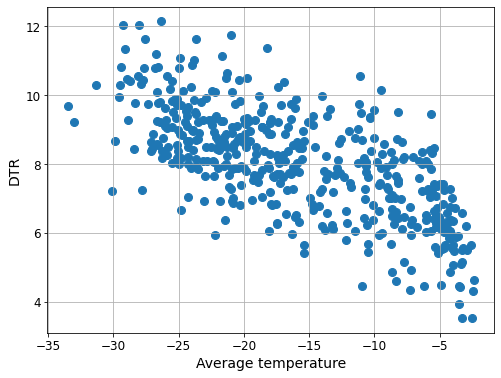

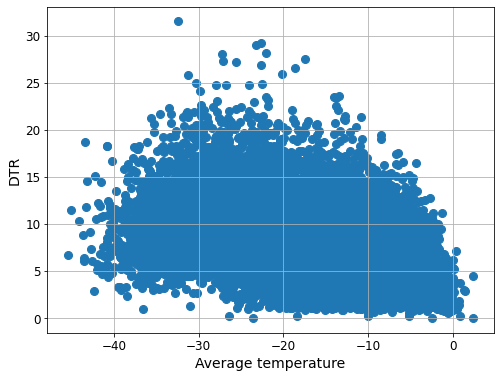

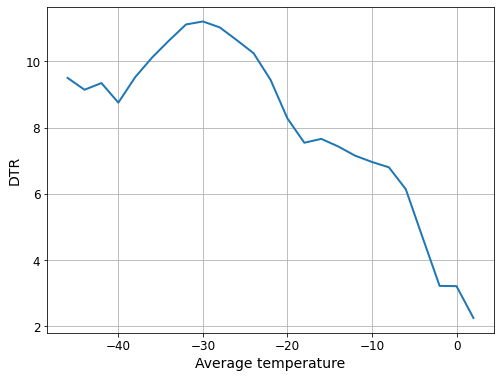

In [ ]:
plt.scatter(df_month['T2Avg'], df_month['DTR'])

plt.xlabel('Average temperature')
plt.ylabel('DTR')

# plt.savefig('GVN_T2Avg_DTR.png', dpi = 300)

plt.show()

plt.scatter(df_days['T2Avg'], df_days['DTR'])

plt.xlabel('Average temperature')
plt.ylabel('DTR')

# plt.savefig('GVN_T2Avg_DTR.png', dpi = 300)

plt.show()

plt.plot(means_df['TAvg_bin'], means_df['DTR'])

plt.xlabel('Average temperature')
plt.ylabel('DTR')

# plt.savefig('GVN_T2Avg_DTR.png', dpi = 300)

plt.show()



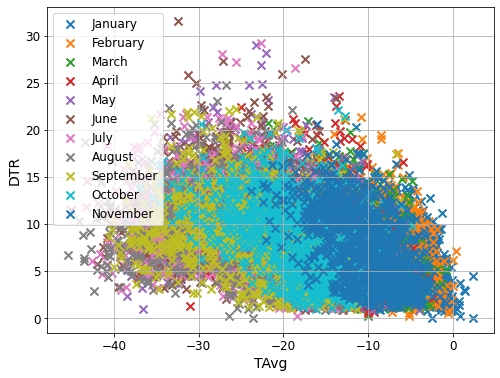

In [ ]:


for i in range(1,12):
    plt.scatter(monthly_data_days[i]['T2Avg'], monthly_data_days[i]['DTR'], marker = 'x', alpha = 1, label = month_label[i-1])

plt.xlabel('TAvg')
plt.ylabel('DTR')

plt.legend()

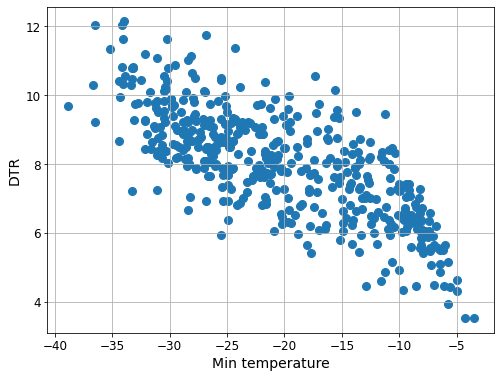

In [ ]:
# plt.scatter(df_month['T2Min'], df_month['DTR'])

# plt.xlabel('Min temperature')
# plt.ylabel('DTR')


# plt.show()

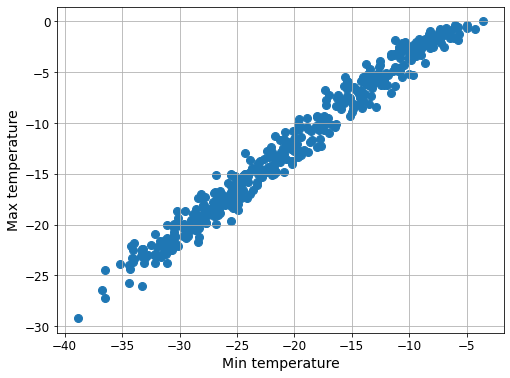

In [ ]:
plt.scatter(df_month['T2Min'], df_month['T2Max'])

plt.xlabel('Min temperature')
plt.ylabel('Max temperature')


plt.show()

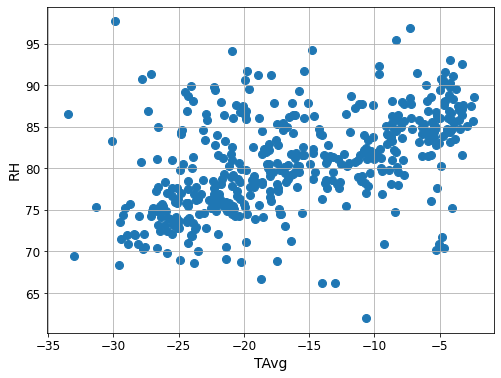

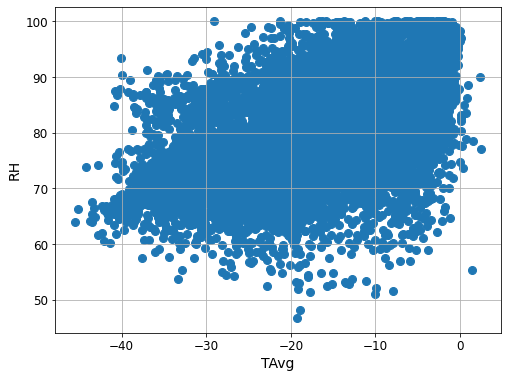

In [ ]:
plt.scatter( df_month['T2Avg'], df_month['RH'],)

plt.ylabel('RH')
plt.xlabel('TAvg')

plt.show()


plt.scatter( df_days['T2Avg'], df_days['RH'],)

plt.ylabel('RH')
plt.xlabel('TAvg')

plt.show()


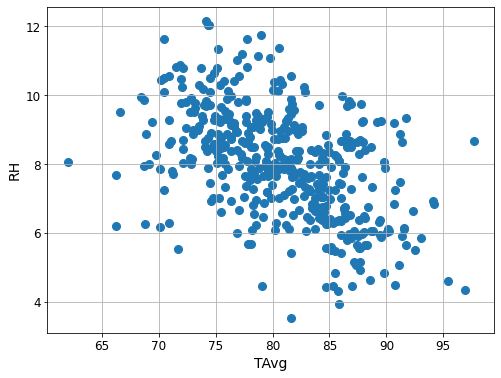

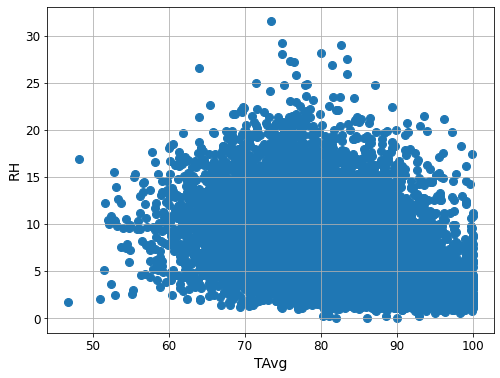

In [ ]:
plt.scatter( df_month['RH'], df_month['DTR'],)

plt.ylabel('RH')
plt.xlabel('TAvg')

plt.show()


plt.scatter( df_days['RH'], df_days['DTR'],)

plt.ylabel('RH')
plt.xlabel('TAvg')

plt.show()


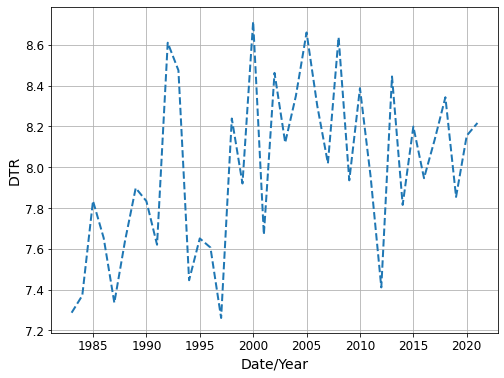

In [ ]:
plt.plot(df_years['Date'], df_years['DTR'], ls = '--')

plt.xlabel('Date/Year')
plt.ylabel('DTR')

plt.savefig('GVN_Date_DTR.png', dpi = 300)

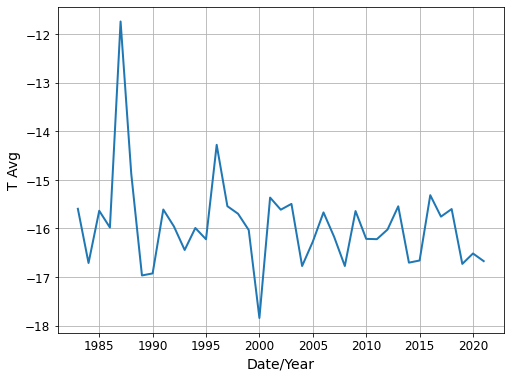

In [ ]:
plt.plot(df_years['Date'], df_years['T2Avg'])

plt.xlabel('Date/Year')
plt.ylabel('T Avg')

plt.savefig('GVN_Date_T2Avg.png', dpi = 300)
